In [8]:
import sys
sys.path.append("../")
from model import *
from AliLoader import *

from torch.utils.data import DataLoader
import torchvision.datasets as dset
from torch.autograd import Variable
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import manifold
from sklearn import metrics
from scipy import stats
from AliMisc import *
from PIL import Image
from skopt.space import Real, Integer
from skopt import Optimizer

newseed = 13
print(newseed)
np.random.seed(newseed)
LS = 512 #Latent Space Size
ColorsNumber = 1 #Number of color (always 1 for x-ray)
isize = 64

name = "Exp_64_512_0.00001_RandomLabel_4.0"

datadir = "./ChestXray-NIHCC-2/"

ExpDir = "../model/"+name


batch_size = 10


def GetAlphaRedMap(cmap):
    #Print Rebuild
    # Get the colormap colors
    AlphaRed = cmap(np.arange(cmap.N))
    # Set alpha
    AlphaRed[:,-1] = np.linspace(0, 1, cmap.N)
    # Create new colormap
    AlphaRed = ListedColormap(AlphaRed)
    return(AlphaRed)
AlphaRed = GetAlphaRedMap(plt.cm.Reds)

CP = -2 #Checkpoint to load (-2 for latest one, -1 for last epoch)
DisX,DisZ,DisXZ,GenZ,GenX,CP,DiscriminatorLoss,AllAUCs = GenModel(isize,LS,-2,ExpDir,name,ColorsNumber=ColorsNumber)

DisX = DisX.eval()
DisZ = DisZ.eval()
DisXZ = DisXZ.eval()
GenZ = GenZ.eval()
GenX = GenX.eval()


def TransformPImg(pim,inputsize,ar):
    tx = ar[0]
    ty = ar[1]
    rot = ar[2]
    sc = ar[3]
    brightness_factor = ar[4]
    contrast_factor = ar[5]
    tim = transforms.functional.affine(pim,angle=rot, translate=[tx,ty], 
                                                   scale=1, shear=0, resample=0, fillcolor=0)
    
    tim = transforms.functional.adjust_brightness(tim, brightness_factor)
    tim = transforms.functional.adjust_contrast(tim, contrast_factor)
    data_transforms = transforms.Compose([transforms.CenterCrop(sc)])
    ftim = data_transforms(tim)
    reim = transforms.functional.resize(ftim,inputsize)
    tim = transforms.functional.to_tensor(reim)
    tim = tim.reshape(1,1,inputsize,inputsize)
    return(ftim,tim)
    




def OutScore(DisX,DisZ,DisXZ,GenZ,GenX,X):
    z = GenZ(X)
    Xr = GenX(z)
    
    
    DiffX = Xr - X
    
    
    RealCat= torch.cat((DisZ(z), DisX(X)), 1)
    PredReal  = DisXZ(RealCat)

    
    if torch.cuda.is_available():
        DiffX = DiffX.cpu()
    
    DiffX = DiffX.detach().numpy()
    DiffX = np.power(DiffX,2)
    RecLoss = [np.sqrt(np.mean(x)) for x in DiffX]

    return(RecLoss,Xr.detach().numpy(),DiffX,PredReal.detach().numpy())



Paths = glob.glob("/media/vince/MILA/Chest_data/MURA-v1.1/valid/*/*/*/*")

#Paths = glob.glob("./ChestXray-NIHCC-2/images/*.png")

RandInt = 10
Explore = 10
Paths = np.random.permutation(Paths)


13
I found this last checkpoint 2121000


In [9]:
Paths

array(['/media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_HAND/patient11601/study1_negative/image1.png',
       '/media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_WRIST/patient11204/study1_positive/image1.png',
       '/media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_HUMERUS/patient11646/study1_positive/image1.png',
       ...,
       '/media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_ELBOW/patient11358/study1_positive/image1.png',
       '/media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_SHOULDER/patient11771/study1_negative/image4.png',
       '/media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_ELBOW/patient11817/study1_positive/image5.png'],
      dtype='<U96')

0 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_HAND/patient11601/study1_negative/image1.png


/media/vince/anaconda3/envs/xray/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


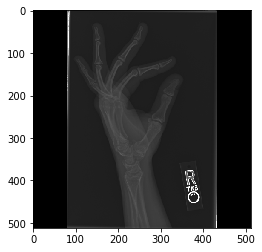

1 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_WRIST/patient11204/study1_positive/image1.png


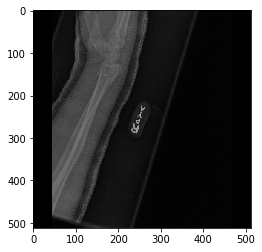

2 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_HUMERUS/patient11646/study1_positive/image1.png


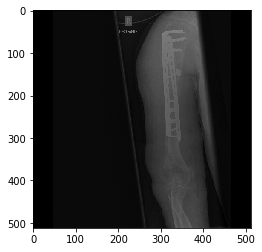

3 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_SHOULDER/patient11780/study1_negative/image4.png


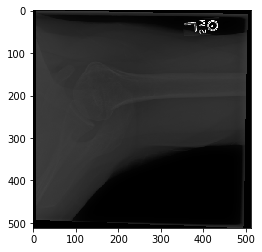

4 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_FOREARM/patient11215/study1_negative/image1.png


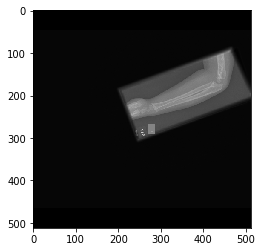

5 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_WRIST/patient11262/study1_positive/image3.png


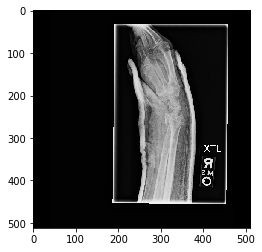

6 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_WRIST/patient11320/study1_negative/image3.png


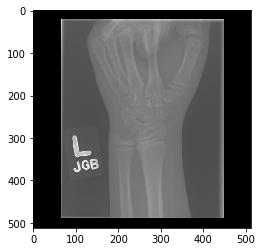

7 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_FINGER/patient11705/study1_positive/image3.png


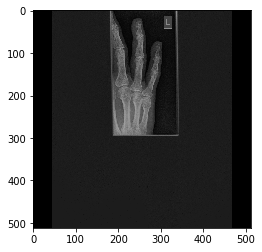

8 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_WRIST/patient11237/study1_positive/image3.png


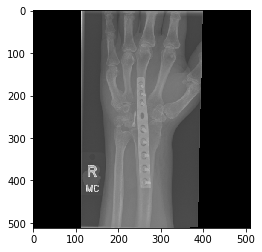

9 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_HUMERUS/patient11391/study1_positive/image2.png


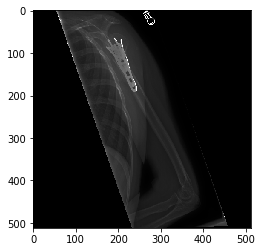

10 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_SHOULDER/patient11767/study1_negative/image4.png


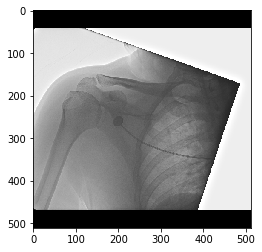

11 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_SHOULDER/patient11466/study1_negative/image2.png


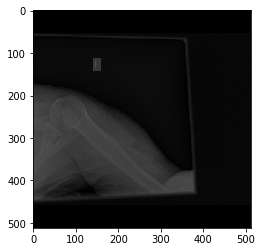

12 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_FOREARM/patient11316/study1_negative/image2.png


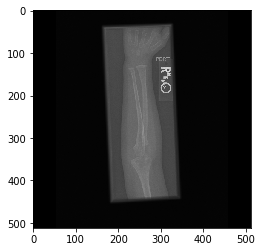

13 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_FOREARM/patient11481/study1_negative/image2.png


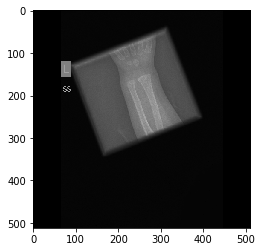

14 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_ELBOW/patient11534/study1_negative/image3.png


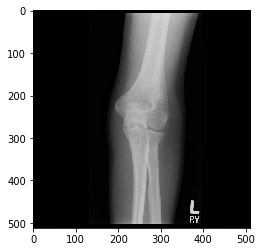

15 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_SHOULDER/patient11300/study1_positive/image3.png


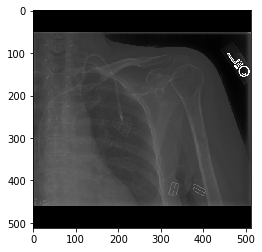

16 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_SHOULDER/patient11485/study2_negative/image1.png


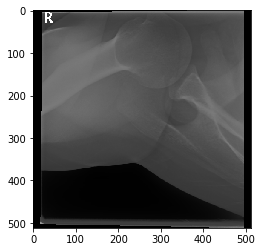

17 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_SHOULDER/patient11746/study1_positive/image1.png


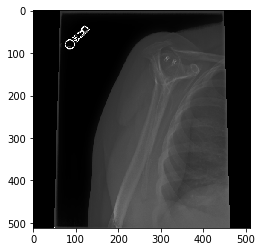

18 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_ELBOW/patient11603/study1_positive/image1.png


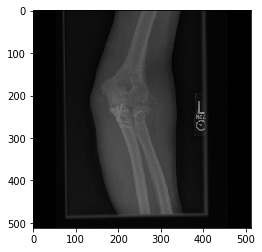

19 /media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_HAND/patient11591/study1_negative/image2.png


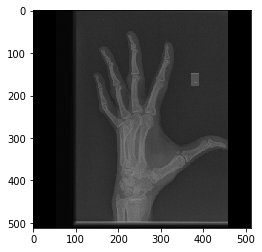

In [10]:
for i in range(20):
    ptf = Paths[i]
    print(i,ptf)

    name = "Align_"+"_".join(ptf.split("/")[-2:])

    im = misc.imread(ptf)
    if len(im.shape) > 2:
        im = im[:, :, 0]
    #Add color chanel
    im = im[:,:,None]

    padding = 0
    if im.shape[0] > im.shape[1]:
        padding = (int((im.shape[0]-im.shape[1])/2),0)
    else:
        padding = (0,int((im.shape[1]-im.shape[0])/2))

    data_transforms = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Pad(padding,fill=0)
    ])
    pim = data_transforms(im)
    plt.imshow(pim)
    plt.show()


In [11]:
ptf = Paths[13]
ptf = Paths[0]
print(ptf)

name = "Align_"+"_".join(ptf.split("/")[-2:])
print(name)

im = misc.imread(ptf)
if len(im.shape) > 2:
    im = im[:, :, 0]
#Add color chanel
im = im[:,:,None]

padding = 0
if im.shape[0] > im.shape[1]:
    padding = (int((im.shape[0]-im.shape[1])/2),0)
else:
    padding = (0,int((im.shape[1]-im.shape[0])/2))

data_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Pad(padding,fill=0)
])
pim = data_transforms(im)

/media/vince/MILA/Chest_data/MURA-v1.1/valid/XR_HAND/patient11601/study1_negative/image1.png
Align_study1_negative_image1.png


/media/vince/anaconda3/envs/xray/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [13]:



#pim = transforms.functional.to_pil_image(im)

space  = [Integer(-800, 800, name='tx'),
      Integer(-800, 800, name='ty'),
      Real(-180,180, name='rot'),
      Integer(int(np.max(np.shape(pim))/10), np.max(np.shape(pim)), name='sc'),
      Real(0.00001,11.4, name='Bright'),
      Real(0.00001,11.4, name='Contrast')
      ]

space  = [Integer(-100, 100, name='tx'),
      Integer(-100, 100, name='ty'),
      Real(-20,20, name='rot'),
      Integer(int(np.max(np.shape(pim))/10), np.max(np.shape(pim)), name='sc'),
      Real(0.8,1.2, name='Bright'),
      Real(0.8,1.2, name='Contrast')
      ]


opt = Optimizer(space,acq_optimizer="lbfgs",acq_func="LCB")

#Get random value


Fimg = []
Errs = []
Explore = 10
RandInt = 20
c = 1

rl = []
Xr = []
DiffX = []
Disc = []
AllTens = []
for it in range(Explore):
    RandTest = []
    if it == 0:
        MinRL = 999
        RandTest.append([0,0,0,np.max(np.shape(pim)),1,1])
        for rot in [-15,-10,-5,5,10,15]:
            RandTest.append([0,0,rot,np.max(np.shape(pim)),1,1])
        for scale in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
            RandTest.append([0,0,0,int(np.max(np.shape(pim))*scale),1,1])
        for b in [0.9,0.95,1.05,1.1]:
            RandTest.append([0,0,0,int(np.max(np.shape(pim))),b,1])
        for b in [0.9,0.95,1.05,1.1]:
            RandTest.append([0,0,0,int(np.max(np.shape(pim))),1,b])
        
        
    totest = opt.ask(n_points=RandInt)
    RandTest += totest
    
    NTest = []
    for r in RandTest:
        if r in NTest:
            continue
        NTest.append(r)
    print(len(NTest),len(RandTest))
    RandTest = NTest
    
    
    TensorTsc = torch.tensor([])
    for i in range(len(RandTest)):
        
        FullImg,TensorImg = TransformPImg(pim,isize,RandTest[i])
        Fimg.append(FullImg)
        TensorTsc = torch.cat((TensorTsc,TensorImg*2.0-1.0),0)
    if torch.cuda.is_available():
        TensorTsc = TensorTsc.cuda()
    trl,tXr,tDiffX,tDisc = OutScore(DisX,DisZ,DisXZ,GenZ,GenX,TensorTsc)
    
    
    tDisc = list(np.ndarray.flatten(tDisc))
    for i in range(len(trl)):
        print(RandTest[i],trl[i])
        opt.tell(RandTest[i], trl[i])
    rl += trl
    Xr += list(tXr)
    DiffX += list(tDiffX)
    Disc += tDisc
    AllTens += list(TensorTsc.detach().numpy())
    print(it,np.min(rl))
    break

44 44
[0, 0, 0, 512, 1, 1] 1.1692268
[0, 0, -15, 512, 1, 1] 1.1351223
[0, 0, -10, 512, 1, 1] 1.1425451
[0, 0, -5, 512, 1, 1] 1.1479858
[0, 0, 5, 512, 1, 1] 1.1713024
[0, 0, 10, 512, 1, 1] 1.1913161
[0, 0, 15, 512, 1, 1] 1.1809443
[0, 0, 0, 51, 1, 1] 0.83859885
[0, 0, 0, 102, 1, 1] 0.8307277
[0, 0, 0, 153, 1, 1] 0.8762315
[0, 0, 0, 204, 1, 1] 0.9228611
[0, 0, 0, 256, 1, 1] 0.9455067
[0, 0, 0, 307, 1, 1] 0.9573972
[0, 0, 0, 358, 1, 1] 0.9976781
[0, 0, 0, 409, 1, 1] 1.0906354
[0, 0, 0, 460, 1, 1] 1.1409819
[0, 0, 0, 512, 0.9, 1] 1.2208605
[0, 0, 0, 512, 0.95, 1] 1.199648
[0, 0, 0, 512, 1.05, 1] 1.1543212
[0, 0, 0, 512, 1.1, 1] 1.1367805
[0, 0, 0, 512, 1, 0.9] 1.1835489
[0, 0, 0, 512, 1, 0.95] 1.181655
[0, 0, 0, 512, 1, 1.05] 1.1697465
[0, 0, 0, 512, 1, 1.1] 1.1665874
[77, -99, 4.792982222220303, 90, 0.8694235462744746, 1.1430937771107939] 1.1058419
[27, -1, -7.307522358685372, 122, 0.8405039852731798, 1.1698151348636876] 0.8496592
[36, -39, 13.847391446469047, 358, 1.0636857697516797, 0.9

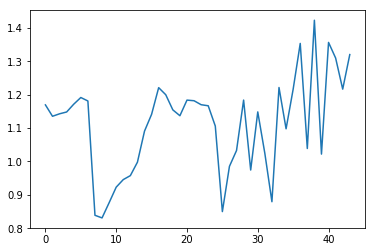

In [14]:
plt.plot(range(len(opt.yi)),opt.yi)

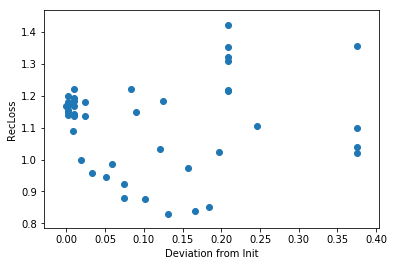

In [15]:
NormTransf = []
for t in np.array(opt.Xi):
    tnorm = []
    for i in range(len(t)):
        #print(i,t[i],space[i].low,space[i].high)
        tnorm.append((t[i]-space[i].low)/(space[i].high-space[i].low))
    NormTransf.append(tnorm)
uTransf = np.mean(np.power(np.array(NormTransf) - np.array(NormTransf[0]),2),axis=1)


plt.scatter(uTransf,rl)
plt.xlabel("Deviation from Init")
plt.ylabel("RecLoss")
plt.show()


1.1692268 0.91028535


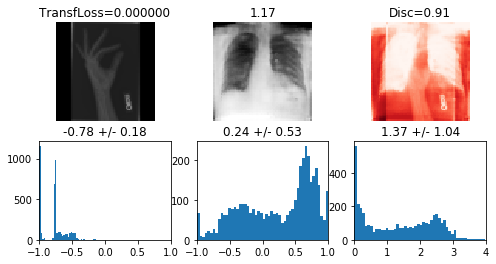

0.8307277 0.8660654


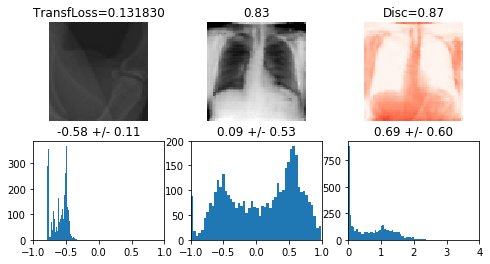

0.83859885 0.87937933


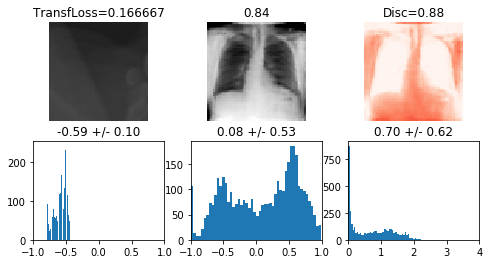

0.8496592 0.87770134


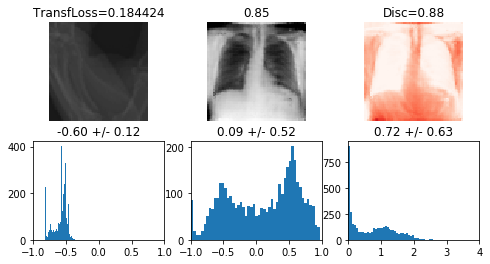

0.8762315 0.88095015


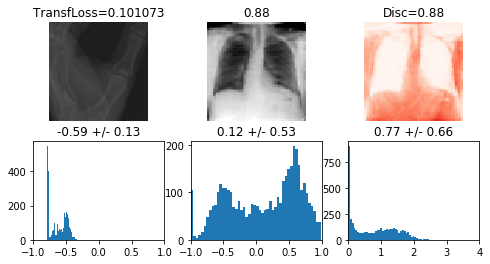

0.87924045 0.78268987


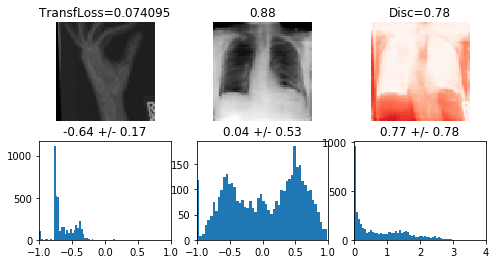

1.3095435 0.93835473


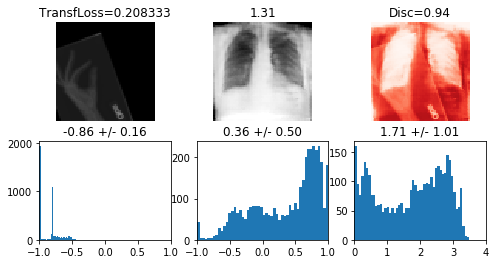

1.319902 0.9448705


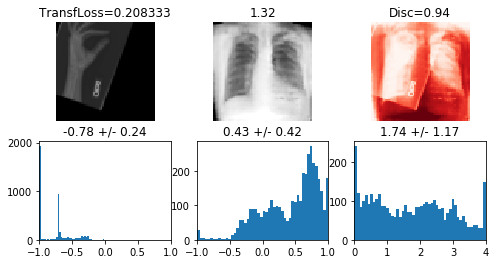

1.3533126 0.96585107


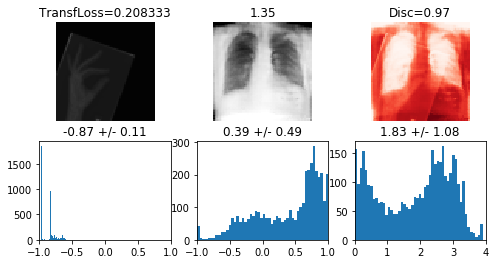

1.3563007 0.9733244


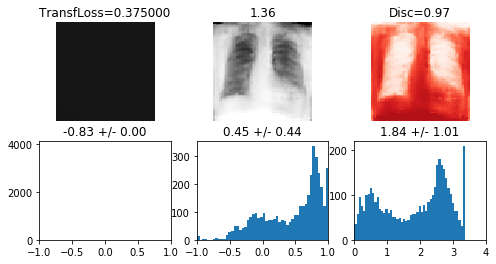

1.422733 0.9635212


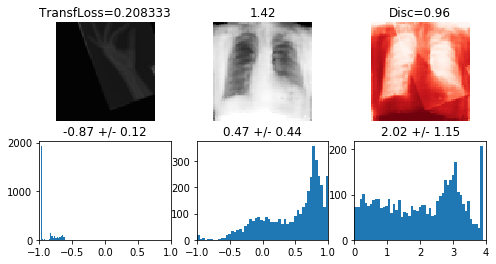

In [16]:
ind = [0] + list(np.argsort(rl))[:5] + list(np.argsort(rl))[-5:]
printed = 0
for i in ind:
    #if rl[i] > rl[0]:
    #    continue
    #if uTransf[i] > 0.1:
    #    continue
    print(rl[i],Disc[i])
    fig = plt.figure(figsize=(8,4))
    c = 1
    plt.subplot(2,3,c)
    plt.imshow(AllTens[i][0],cmap="gray",vmin=-1,vmax=1)
    plt.title("TransfLoss=%.6f" % (uTransf[i]))
    

    #plt.title("%.2f" % (rl[i]))
    plt.axis("off")
    c += 1

    plt.subplot(2,3,c)
    plt.imshow(Xr[i][0],cmap="gray",vmin=-1,vmax=1)
    plt.title("%.2f" % (rl[i]))
    plt.axis("off")
    c += 1
    plt.subplot(2,3,c)
    plt.imshow(DiffX[i][0],cmap="Reds",vmin=0,vmax=4)
    #plt.title("Error:%.2f" % (rl[i]))
    plt.title("Disc=%.2f" % (Disc[i]))
    plt.axis("off")
    c += 1
    plt.subplot(2,3,c)
    flat = np.ndarray.flatten(AllTens[i][0])
    plt.hist(flat,bins=50)
    plt.title("%.2f +/- %.2f" % (np.mean(flat),np.std(flat)))
    plt.xlim(-1,1)

    c += 1
    plt.subplot(2,3,c)

    flat = np.ndarray.flatten(Xr[i][0])
    plt.hist(flat,bins=50)
    plt.title("%.2f +/- %.2f" % (np.mean(flat),np.std(flat)))
    plt.xlim(-1,1)
    c += 1
    plt.subplot(2,3,c)
    flat = np.ndarray.flatten(DiffX[i][0])
    plt.hist(flat,bins=50)
    plt.title("%.2f +/- %.2f" % (np.mean(flat),np.std(flat)))
    plt.xlim(0,4)

    plt.show()
    printed += 1
    if printed > 20:
        break


In [ ]:



#pim = transforms.functional.to_pil_image(im)

space  = [Integer(-800, 800, name='tx'),
      Integer(-800, 800, name='ty'),
      Real(-180,180, name='rot'),
      Integer(int(np.max(np.shape(pim))/10), np.max(np.shape(pim)), name='sc'),
      Real(0.00001,11.4, name='Bright'),
      Real(0.00001,11.4, name='Contrast')
      ]

space  = [Integer(-100, 100, name='tx'),
      Integer(-100, 100, name='ty'),
      Real(-180,180, name='rot'),
      Integer(int(np.max(np.shape(pim))/10), np.max(np.shape(pim)), name='sc'),
      Real(0.8,1.2, name='Bright'),
      Real(0.8,1.2, name='Contrast')
      ]




#Get random value


Fimg = []
Errs = []
Explore = 5
RandInt = 20

opt = Optimizer(space,n_initial_points = RandInt)

c = 1

rl = []
Xr = []
DiffX = []
Disc = []
AllTens = []

Xi = []

for it in range(Explore):
    RandTest = []
    totest = opt.ask(n_points=RandInt)
    if it == 0:
        #totest = []
        MinRL = 999
        RandTest.append([0,0,0,np.max(np.shape(pim)),1,1])
        
        for scale in [0.7,0.9,1]:
            for rot in [-15,-5,0,5,15]:
                for b1 in [0.9,1,1.1]:
                    for b2 in [0.9,1,1.1]:
                        RandTest.append([0,0,rot,int(np.max(np.shape(pim))*scale),b1,b2])
        
        
    
    RandTest += totest
    
    NTest = []
    for r in RandTest:
        if r in NTest:
            continue
        NTest.append(r)
    print(len(NTest),len(RandTest))
    RandTest = NTest
    
    
    TensorTsc = torch.tensor([])
    for i in range(len(RandTest)):
        
        FullImg,TensorImg = TransformPImg(pim,isize,RandTest[i])
        Fimg.append(FullImg)
        TensorTsc = torch.cat((TensorTsc,TensorImg*2.0-1.0),0)
    if torch.cuda.is_available():
        TensorTsc = TensorTsc.cuda()
    trl,tXr,tDiffX,tDisc = OutScore(DisX,DisZ,DisXZ,GenZ,GenX,TensorTsc)
    
    rl += trl
    Xr += list(tXr)
    DiffX += list(tDiffX)
    Disc += list(np.ndarray.flatten(tDisc))
    AllTens += list(TensorTsc.detach().numpy())
    Xi += RandTest
    
    
    print(it,np.min(rl))
    opt.tell(RandTest, trl)
    for i in np.argsort(trl)[:10]:
        print(RandTest[i],trl[i])
    #    opt.tell(RandTest[i], trl[i])
    

155 156
0 0.7478569
[-30, 68, -157.98954369344688, 136, 1.1686410646311454, 1.150508783008855] 0.7478569
[17, -44, -36.801317658265134, 135, 1.0148352480120588, 0.9292296240855423] 0.8431495
[60, -57, -124.81405849696631, 100, 1.1699873666425693, 1.1410772990759162] 0.876584
[73, -39, -61.900773646608684, 156, 0.9821084160728246, 1.0721041604343247] 0.8811035
[-26, 87, -133.41591077896453, 153, 1.1248175967489908, 0.9411984075644863] 0.88851684
[0, 0, 0, 358, 1.1, 1.1] 0.9502156
[0, 0, -5, 358, 1.1, 1.1] 0.95099515
[0, 0, -5, 358, 1.1, 1] 0.9547126
[0, 0, 0, 358, 1.1, 1] 0.95615697
[0, 0, -15, 358, 1.1, 1.1] 0.9563596
20 20
1 0.6774411
[62, -38, 15.497676625649945, 51, 1.2, 1.1079486654120725] 0.6774411
[-21, 79, -159.1781741924065, 112, 1.2, 1.1897772768682038] 0.7196068
[-53, 83, -165.0836209988674, 116, 1.2, 1.0157971482413974] 0.80217767
[88, -12, 8.470874354894505, 78, 1.2, 1.1504100813355835] 0.83972853
[-12, 90, -174.5559735567636, 68, 1.0544597557127888, 0.8059242025357387] 0.8

In [ ]:
NormTransf = []
for t in np.array(Xi):
    tnorm = []
    for i in range(len(t)):
        #print(i,t[i],space[i].low,space[i].high)
        tnorm.append((t[i]-space[i].low)/(space[i].high-space[i].low))
    NormTransf.append(tnorm)
uTransf = np.mean(np.power(np.array(NormTransf) - np.array(NormTransf[0]),2),axis=1)


plt.scatter(uTransf,rl)
plt.xlabel("Deviation from Init")
plt.ylabel("RecLoss")
plt.show()


In [ ]:
ind = [0] + list(np.argsort(rl))[:5] + list(np.argsort(rl))[-5:]
printed = 0
for i in ind:
    #if rl[i] > rl[0]:
    #    continue
    #if uTransf[i] > 0.1:
    #    continue
    print(rl[i],Disc[i],Xi[i])
    fig = plt.figure(figsize=(8,4))
    c = 1
    plt.subplot(2,3,c)
    plt.imshow(AllTens[i][0],cmap="gray",vmin=-1,vmax=1)
    plt.title("TransfLoss=%.6f" % (uTransf[i]))
    

    #plt.title("%.2f" % (rl[i]))
    plt.axis("off")
    c += 1

    plt.subplot(2,3,c)
    plt.imshow(Xr[i][0],cmap="gray",vmin=-1,vmax=1)
    plt.title("%.2f" % (rl[i]))
    plt.axis("off")
    c += 1
    plt.subplot(2,3,c)
    plt.imshow(DiffX[i][0],cmap="Reds",vmin=0,vmax=4)
    #plt.title("Error:%.2f" % (rl[i]))
    plt.title("Disc=%.2f" % (Disc[i]))
    plt.axis("off")
    c += 1
    plt.subplot(2,3,c)
    flat = np.ndarray.flatten(AllTens[i][0])
    plt.hist(flat,bins=50)
    plt.title("%.2f +/- %.2f" % (np.mean(flat),np.std(flat)))
    plt.xlim(-1,1)

    c += 1
    plt.subplot(2,3,c)

    flat = np.ndarray.flatten(Xr[i][0])
    plt.hist(flat,bins=50)
    plt.title("%.2f +/- %.2f" % (np.mean(flat),np.std(flat)))
    plt.xlim(-1,1)
    c += 1
    plt.subplot(2,3,c)
    flat = np.ndarray.flatten(DiffX[i][0])
    plt.hist(flat,bins=50)
    plt.title("%.2f +/- %.2f" % (np.mean(flat),np.std(flat)))
    plt.xlim(0,4)

    plt.show()
    printed += 1
    if printed > 20:
        break
